### Logistic Regression $Y\epsilon{[0,1]}$
### SVM $Y \epsilon [-1,1]$
N classes then train N^C2 SVM classifiers
5c2 => 10 classifiers
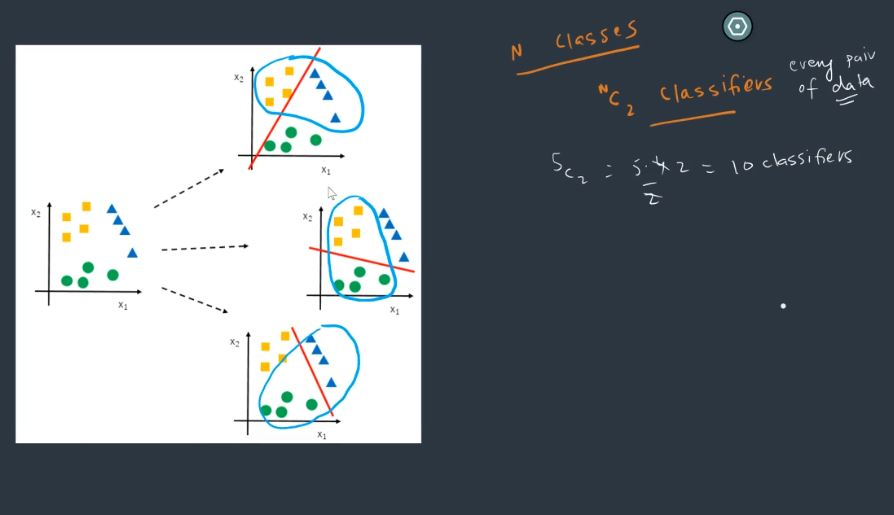

In above figure on running classification we get :-
- (Yellow, Blue)
- (Yellow, Green)
- (Blue, Green)
- Here Yellow, Blue , Green appears twice, we will take majority vote.
- Let say out of 3 classifier -> 2 Gives Yellow then its a majority voting winner
- It will take O(n^2)
- Useful: When having Large dataset -> Then we use [one vs. one scheme]
- Other Scheme is One vs. Rest as given in given in figure below :-
    - One of class will be taken as positive and all other will be taken as
      Negative.


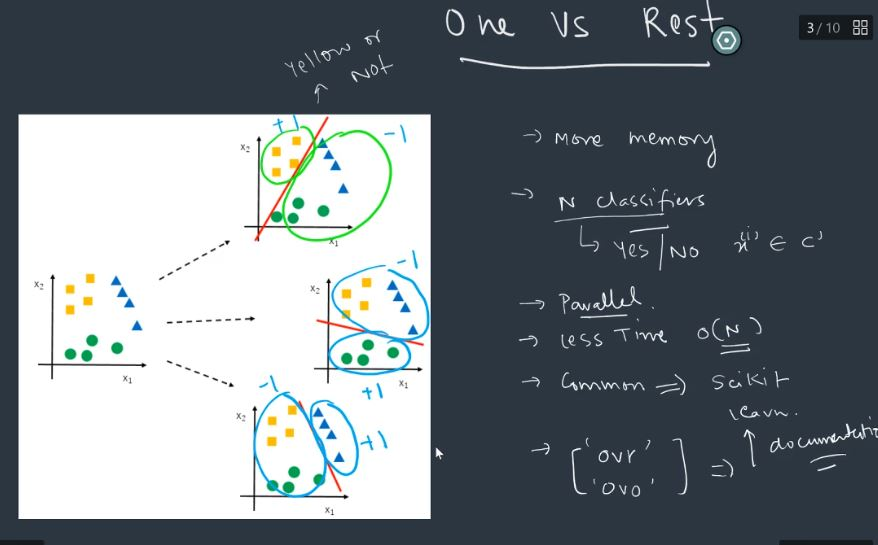

###  Data Preprocessing 

In [1]:
import numpy as np
# Important this to import when working with path and folders
import os
from pathlib import Path
# working with keras here
from keras.preprocessing import image 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
p = Path('./images/')
print(p)
print(type(p))

images
<class 'pathlib.WindowsPath'>


In [41]:
dirs = p.glob("*")
labels_dict = {"cat":0, "dog":1, "horse":2, "human":3}
image_data = list()
labels = list()
for folder_name  in dirs:
    #print(folder_name)
    label = str(folder_name).split("\\")[-1][:-1]
#     print(label)
    
    for img_path in folder_name.glob("*.jpg"):
        img = image.load_img(img_path, target_size = (32,32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

In [42]:
print(len(image_data))
print(len(labels))

808
808


In [43]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [44]:
image_data = np.array(image_data,dtype='float32')/255
labels = np.array(labels)
print(image_data.shape)
print(labels.shape)

(808, 32, 32, 3)
(808,)


In [45]:
### Visualize this data

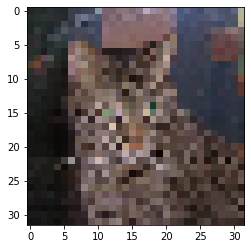

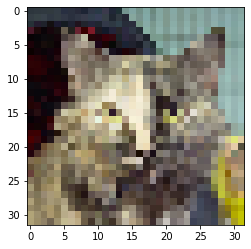

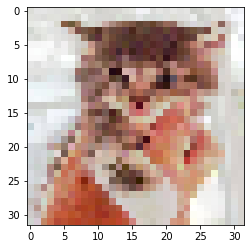

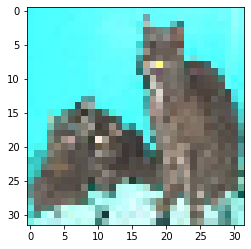

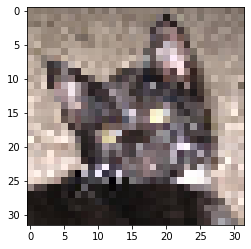

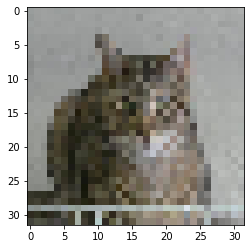

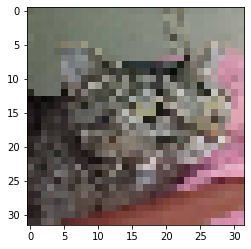

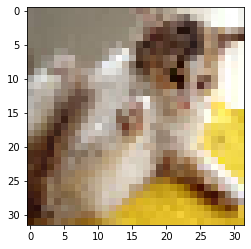

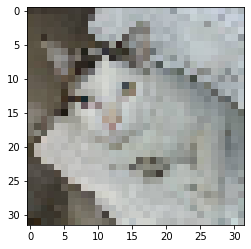

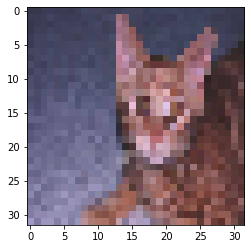

In [46]:
def drawImg(img):
    plt.imshow(img)
    plt.show()
    return
for i in range(10):
    drawImg(image_data[i])
    


### We need to randomly shuffle our data

In [47]:
import random # for shuffling 

In [48]:
combined = list(zip(image_data, labels))
random.shuffle(combined)

# unzip
image_data[:], labels[:] = zip(*combined) # '*' used to unzip anything that is once zipped

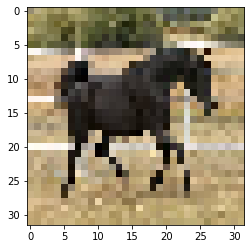

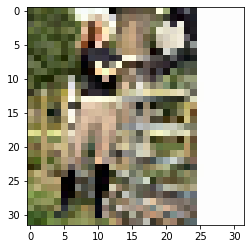

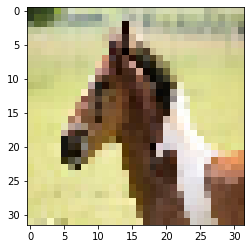

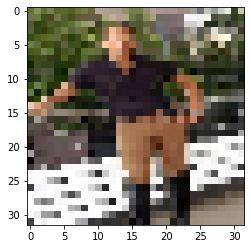

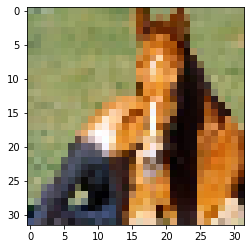

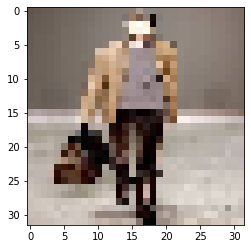

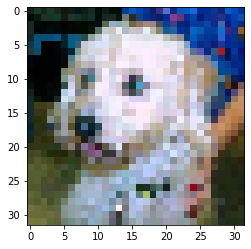

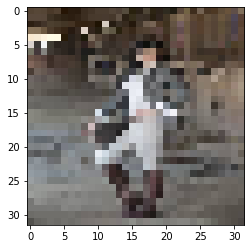

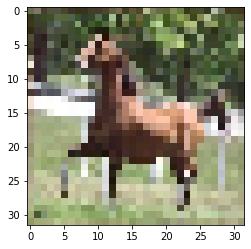

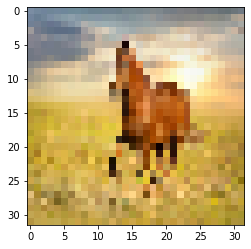

In [49]:
def drawImg(img):
    plt.imshow(img)
    plt.show()
    return
for i in range(10):
    drawImg(image_data[i])

### SVM Classifier

In [50]:
class SVM:
    def __init__(self, C =1.0):
        # C :- how much to palanize
        self.C = C
        self.W = 0
        self.b = 0

    def hingeLoss(self,W,b,X,Y):
        loss = 0.0
        loss += 0.5*np.dot(W,W.T)
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*max(0,(1-ti))
               
        return loss[0][0]
    
    def fit(self,X,Y, batch_size = 100,learning_rate = 0.001, maxItr = 300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #init the model parameters
        W = np.zeros((1, no_of_features))
        bias = 0
        
        print(self.hingeLoss(W,bias,X,Y))
        
        # Training from here
        # Weight ans bias update rule that we discussed
        losses = []
        
        for i in range(maxItr):
            # Training loop
            l = self.hingeLoss(W,bias, X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch gradient descent with random shuffling 
            for batch_start in range(0, no_of_samples, batch_size):
                # Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                # Iterate over all the examples in the mini batch
                for j in range(batch_start, batch_start+batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                # Batch gradient is completed
                
                W = W - n*W + n*gradw
                bias = bias + n*gradb
        self.W = W
        self.b = bias
        return W,bias,losses          

### We need to convert data for one for one classification

In [51]:
image_data.shape

(808, 32, 32, 3)

In [52]:
labels.shape

(808,)

In [53]:
M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)


In [54]:
classes = len(np.unique(labels))
print(classes)

4


In [59]:
def classWiseData(x,y):
    data = {}
    for i in range(classes):
        data[i] = list()
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [60]:
data = classWiseData(image_data, labels)

In [67]:
print(data[0].shape[0],
data[1].shape[0],
data[2].shape[0],
data[3].shape[0])

202 202 202 202


In [78]:
def getDataPairForSVM(d1,d2):
    # Combines data of two classes into a single matrix
    l1,l2 = d1.shape[0], d2.shape[0]
    samples = l1+l2
    features = d1.shape[1]
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1 # for logistic regression its -> 0
    data_labels[l1:] = +1 # for logistic regression its -> 1
    
    return data_pair, data_labels

### Train NC2 SVM's i.e One Vs. One Scheme

404.0
[404.0, 402.0752978459967, 389.1607944489404, 428.69229409000684, 514.309110806748, 538.0196255333354, 588.4055236198809, 368.98625227605106, 413.7013861208519, 504.842885113896, 514.8376261911637, 470.18772028517344, 430.1172065446067, 596.514356947942, 485.6530162359623, 545.6705201398275, 344.26775407122, 353.26009566483475, 455.25836931918224, 415.038116363739, 367.46472921099485, 624.5345341400441, 541.1801966297498, 430.6589354398922, 402.26354623971383, 469.18780527292324, 320.1903575305368, 320.82789321622744, 511.1443729849518, 345.41785724890553, 309.74578473582005, 443.5193428901355, 307.13962210962234, 302.48699917586924, 448.2254694885992, 360.5758644810399, 468.0589719751888, 476.0774004894198, 381.0284560859873, 438.77271142394187, 361.8113205337959, 290.330918787403, 419.4710413071647, 483.6090980449623, 394.12892429974175, 446.24145951760374, 464.26387613083233, 436.4140139054688, 391.8571595131117, 410.9480296663448, 425.4559972825374, 463.0721885365504, 325.404

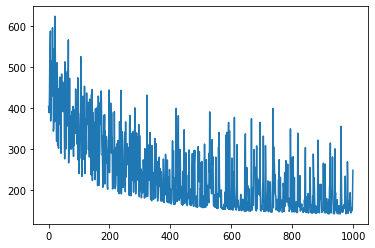

In [116]:
mySVM = SVM() # class defined above
xp,yp = getDataPairForSVM(data[0],data[1])
w,b,loss = mySVM.fit(xp,yp, learning_rate = 0.0001, maxItr = 1000)
print(loss)
plt.plot(loss)

In [117]:
def trainSVMs(x,y):
    svm_classifiers = {}
    for i in range(classes):
        svm_classifiers[i] = {}
        for j in range(i+1, classes):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts, bais, loss = mySVM.fit(xpair, ypair,learning_rate = 0.0001, maxItr = 1000)
            svm_classifiers[i][j] = (wts,bais)
    return svm_classifiers

In [118]:
svm_classifiers = trainSVMs(image_data, labels)

404.0
404.0
404.0
404.0
404.0
404.0


In [119]:
cats_dogs = svm_classifiers[0][1]
cats_humans = svm_classifiers[0][3]
print(cats_dogs[0].shape)
print(cats_dogs[1].shape)
print(cats_dogs[1])

(1, 3072)
()
-0.05580000000000022


### Prediction

In [120]:
def binaryPredict(x,w,b):
    z = np.dot(x,w.T) + b
    if z >= 0 :
        return 1
    else:
        return -1 

In [121]:
def predict(x):
    count = np.zeros((classes,))
    for i in range(classes):
        for j in range(i+1, classes):
            w,b = svm_classifiers[i][j]
            # take majority prediction
            z = binaryPredict(x,w,b)
            if z == 1:
                count[j]+=1
            else:
                count[i]+=1
    final_prediction=np.argmax(count)
   # print(count)
    return final_prediction

In [122]:
predict(image_data[0])

0

In [123]:
def accuracy(x,y):
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count+=1
            
    return count/x.shape[0]

In [126]:
accuracy(image_data, labels) #improved accuracy with change in lR and Epocs

0.6311881188118812

In [127]:
svm_classifiers[0][1]

(array([[ 0.04956551,  0.04525677,  0.04343607, ..., -0.05200083,
         -0.00824975, -0.04177483]]),
 -0.05580000000000022)

###  Using Sklearn

In [128]:
from sklearn import svm

In [129]:
svm_classifier = svm.SVC(kernel = 'linear', C=1)

In [130]:
svm_classifier.fit(image_data, labels)

SVC(C=1, kernel='linear')

In [132]:
svm_classifier.score(image_data, labels) # same as above

0.6435643564356436